<a href="https://colab.research.google.com/github/gezmi/ColabDesign/blob/main/plmalign_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>1. Fast Start: Align all pairs between query & target</h1>

In [1]:
%%bash
git clone https://github.com/maovshao/PLMAlign.git

pip install fair-esm biopython


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.6 MB/s eta 0:00:00


Cloning into 'PLMAlign'...


In [3]:
%cd PLMAlign

/content/PLMAlign


In [4]:
%load_ext autoreload
%autoreload 2

# first edit the model path in embedding generate.py to Rostlab/prot_t5_xl_uniref50
# then run this cell
# this cell is to be able to edit the code and applying it without restarting the runtime

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from plmalign.plmalign import plmalign_pipeline
plmalign_pipeline('example/query.fasta', 'example/target.fasta')

Align with method: plmalign
Using device: cpu
##########################
Loading cached model from: Rostlab/prot_t5_xl_uniref50
##########################


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/11.3G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


########################################
Total number of sequences: 1
Average sequence length: 367.0
Number of sequences >1022: 0


100%|██████████| 1/1 [00:19<00:00, 19.72s/it]

Embedded protein P0AD96 with length 367 to emb. of shape: torch.Size([367, 1024])

############# STATS #############
Total number of embeddings: 1


Using device: cpu
##########################
Loading cached model from: Rostlab/prot_t5_xl_uniref50
##########################
########################################
Total number of sequences: 5
Average sequence length: 330.6
Number of sequences >1022: 0


100%|██████████| 5/5 [02:00<00:00, 24.20s/it]

Embedded protein P22768 with length 420 to emb. of shape: torch.Size([420, 1024])

############# STATS #############
Total number of embeddings: 5



Query: 100%|██████████| 1/1 [00:07<00:00,  7.08s/it]

P0AD96	P0AD96	 Score = 35.781009674072266

P0AD96	P0AD96
MNIKGKALLAGCIALAFSNMALAEDIKVAVVGAMSGPVAQYGDQEFTGAEQAVADINAKGGIKGNKLQIVKYDDACDPKQAVAVANKVVNDGIKYVIGHLCSSSTQPASDIYEDEGILMITPAATAPELTARGYQLILRTTGLDSDQGPTAAKYILEKVKPQRIAIVHDKQQYGEGLARAVQDGLKKGNANVVFFDGITAGEKDFSTLVARLKKENIDFVYYGGYHPEMGQILRQARAAGLKTQFMGPEGVANVSLSNIAGESAEGLLVTKPKNYDQVPANKPIVDAIKAKKQDPSGAFVWTTYAALQSLQAGLNQSDDPAEIAKYLKANSVDTVMGPLTWDEKGDLKGFEFGVFDWHANGTATDAK
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
MNIKGKALLAGCIALAFSNMALAEDIKVAVVGAMSGPVAQYGDQEFTGAEQAVADINAKGGIKGNKLQIVKYDDACDPKQAVAVANKVVNDGIKYVIGHLCSSSTQPASDIYEDEGILMITPAATAPELTARGYQLILRTTGLDSDQGPTAAKYILEKVKPQRIAIVHDKQQYGEGLARAVQDGLKKGNANVVFFDGITAGEKDFST

<h1>2. Advanced pipeline</h1>

<H3>2.1 Generate embeddings</H3>

In [ ]:
from plmalign.embedding_generate import esm_embedding_generate, prottrans_embedding_generate

query_fasta = 'example/query.fasta'
target_fasta = 'example/target.fasta'

#ESM-1b Embedding
query_embedding_path = 'example/query_esm_embedding/'
target_embedding_path = 'example/target_esm_embedding/'

esm_embedding_generate(query_fasta, query_embedding_path)
esm_embedding_generate(target_fasta, target_embedding_path)

#ProtT5 Embedding
query_embedding_path = 'example/query_t5_embedding/'
target_embedding_path = 'example/target_t5_embedding/'

prottrans_embedding_generate(query_fasta, query_embedding_path)
prottrans_embedding_generate(target_fasta, target_embedding_path)

/home/lw/anaconda3/envs/plmblast/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Transferred model to GPU
Read example/query.fasta with 1 sequences
Processing 1 of 1 batches (1 sequences)
Transferred model to GPU
Read example/target.fasta with 5 sequences
Processing 1 of 1 batches (5 sequences)
Using device: cuda:0
##########################
Loading cached model from: data/model/Rostlab/prot_t5_xl_uniref50/
##########################


Some weights of the model checkpoint at data/model/Rostlab/prot_t5_xl_uniref50/ were not used when initializing T5EncoderModel: ['decoder.block.5.layer.2.layer_norm.weight', 'decoder.block.20.layer.0.SelfAttention.k.weight', 'decoder.block.15.layer.1.layer_norm.weight', 'decoder.block.1.layer.1.EncDecAttention.o.weight', 'decoder.block.16.layer.0.layer_norm.weight', 'decoder.block.18.layer.1.EncDecAttention.v.weight', 'decoder.block.17.layer.1.EncDecAttention.k.weight', 'decoder.block.23.layer.2.DenseReluDense.wi.weight', 'decoder.block.16.layer.0.SelfAttention.v.weight', 'decoder.block.18.layer.0.SelfAttention.q.weight', 'decoder.block.19.layer.0.SelfAttention.v.weight', 'decoder.block.12.layer.2.layer_norm.weight', 'decoder.block.3.layer.2.DenseReluDense.wo.weight', 'decoder.block.17.layer.0.layer_norm.weight', 'decoder.block.20.layer.2.DenseReluDense.wo.weight', 'decoder.block.12.layer.1.EncDecAttention.o.weight', 'decoder.block.18.layer.1.EncDecAttention.k.weight', 'decoder.block.1

########################################
Total number of sequences: 1
Average sequence length: 367.0
Number of sequences >1022: 0


100%|██████████| 1/1 [00:00<00:00,  6.66it/s]

Embedded protein P0AD96 with length 367 to emb. of shape: torch.Size([367, 1024])

############# STATS #############
Total number of embeddings: 1
Using device: cuda:0
##########################
Loading cached model from: data/model/Rostlab/prot_t5_xl_uniref50/
##########################



Some weights of the model checkpoint at data/model/Rostlab/prot_t5_xl_uniref50/ were not used when initializing T5EncoderModel: ['decoder.block.5.layer.2.layer_norm.weight', 'decoder.block.20.layer.0.SelfAttention.k.weight', 'decoder.block.15.layer.1.layer_norm.weight', 'decoder.block.1.layer.1.EncDecAttention.o.weight', 'decoder.block.16.layer.0.layer_norm.weight', 'decoder.block.18.layer.1.EncDecAttention.v.weight', 'decoder.block.17.layer.1.EncDecAttention.k.weight', 'decoder.block.23.layer.2.DenseReluDense.wi.weight', 'decoder.block.16.layer.0.SelfAttention.v.weight', 'decoder.block.18.layer.0.SelfAttention.q.weight', 'decoder.block.19.layer.0.SelfAttention.v.weight', 'decoder.block.12.layer.2.layer_norm.weight', 'decoder.block.3.layer.2.DenseReluDense.wo.weight', 'decoder.block.17.layer.0.layer_norm.weight', 'decoder.block.20.layer.2.DenseReluDense.wo.weight', 'decoder.block.12.layer.1.EncDecAttention.o.weight', 'decoder.block.18.layer.1.EncDecAttention.k.weight', 'decoder.block.

########################################
Total number of sequences: 5
Average sequence length: 330.6
Number of sequences >1022: 0


100%|██████████| 5/5 [00:00<00:00,  6.25it/s]

Embedded protein P22768 with length 420 to emb. of shape: torch.Size([420, 1024])

############# STATS #############
Total number of embeddings: 5


{'P22768': tensor([[ 1.0952e-01, -1.2699e-01, -2.0552e-03,  ...,  1.4663e-01,
           4.0439e-03,  3.1096e-01],
         [ 1.3217e-02, -7.4873e-02,  1.4688e-01,  ..., -4.2054e-02,
           1.7233e-01,  2.2892e-01],
         [ 2.2815e-02, -3.6027e-04,  3.7234e-01,  ..., -9.3900e-02,
           3.4445e-01,  2.5699e-01],
         ...,
         [ 1.8210e-02,  2.4128e-01, -6.3118e-02,  ..., -9.1909e-02,
          -1.4618e-01,  1.3018e-01],
         [-1.5932e-01,  5.9697e-03,  2.2184e-01,  ..., -1.0124e-01,
          -8.5778e-02,  1.5755e-01],
         [-1.2461e-01,  1.0683e-01,  2.3168e-01,  ..., -5.1994e-02,
          -2.4646e-01,  1.0271e-01]]),
 'P15104': tensor([[ 0.1637, -0.0415, -0.1123,  ...,  0.2878,  0.0504,  0.2132],
         [-0.1606, -0.0283, -0.0152,  ...,  0.0510,  0.0083,  0.0291],
         [ 0.0362, -0.0620,  0.0210,  ...,  0.1527, -0.0543, -0.0997],
         ...,
         [-0.1089,  0.0438, -0.0948,  ..., -0.0839, -0.2940, -0.0812],
         [-0.1475, -0.0790,  0.2458,

In [119]:
from plmalign.embedding_generate import esm_embedding_generate, prottrans_embedding_generate

!echo -e ">ELMI000792\nQGRLDDFFKV" > example/ELMI000792.fasta
!echo -e ">DPOD3_HUMAN\nMADQLYLENIDEFVTDQNKIVTYKWLSYTLGVHVNQAKQMLYDYVERKRKENSGAQLHVTYLVSGSLIQNGHSCHKVAVVREDKLEAVKSKLAVTASIHVYSIQKAMLKDSGPLFNTDYDILKSNLQNCSKFSAIQCAAAVPRAPAESSSSSKKFEQSHLHMSSETQANNELTTNGHGPPASKQVSQQPKGIMGMFASKAAAKTQETNKETKTEAKEVTNASAAGNKAPGKGNMMSNFFGKAAMNKFKVNLDSEQAVKEEKIVEQPTVSVTEPKLATPAGLKKSSKKAEPVKVLQKEKKRGKRVALSDDETKETENMRKKRRRIKLPESDSSEDEVFPDSPGAYEAESPSPPPPPSPPLEPVPKTEPEPPSVKSSSGENKRKRKRVLKSKTYLDGEGCIVTEKVYESESCTDSEEELNMKTSSVHRPPAMTVKKEPREERKGPKKGTAALGKANRQVSITGFFQRK" > example/target_proteins.fasta
!echo -e ">DNMT1_HUMAN\nMPARTAPARVPTLAVPAISLPDDVRRRLKDLERDSLTEKECVKEKLNLLHEFLQTEIKNQLCDLETKLRKEELSEEGYLAKVKSLLNKDLSLENGAHAYNREVNGRLENGNQARSEARRVGMADANSPPKPLSKPRTPRRSKSDGEAKPEPSPSPRITRKSTRQTTITSHFAKGPAKRKPQEESERAKSDESIKEEDKDQDEKRRRVTSRERVARPLPAEEPERAKSGTRTEKEEERDEKEEKRLRSQTKEPTPKQKLKEEPDREARAGVQADEDEDGDEKDEKKHRSQPKDLAAKRRPEEKEPEKVNPQISDEKDEDEKEEKRRKTTPKEPTEKKMARAKTVMNSKTHPPKCIQCGQYLDDPDLKYGQHPPDAVDEPQMLTNEKLSIFDANESGFESYEALPQHKLTCFSVYCKHGHLCPIDTGLIEKNIELFFSGSAKPIYDDDPSLEGGVNGKNLGPINEWWITGFDGGEKALIGFSTSFAEYILMDPSPEYAPIFGLMQEKIYISKIVVEFLQSNSDSTYEDLINKIETTVPPSGLNLNRFTEDSLLRHAQFVVEQVESYDEAGDSDEQPIFLTPCMRDLIKLAGVTLGQRRAQARRQTIRHSTREKDRGPTKATTTKLVYQIFDTFFAEQIEKDDREDKENAFKRRRCGVCEVCQQPECGKCKACKDMVKFGGSGRSKQACQERRCPNMAMKEADDDEEVDDNIPEMPSPKKMHQGKKKKQNKNRISWVGEAVKTDGKKSYYKKVCIDAETLEVGDCVSVIPDDSSKPLYLARVTALWEDSSNGQMFHAHWFCAGTDTVLGATSDPLELFLVDECEDMQLSYIHSKVKVIYKAPSENWAMEGGMDPESLLEGDDGKTYFYQLWYDQDYARFESPPKTQPTEDNKFKFCVSCARLAEMRQKEIPRVLEQLEDLDSRVLYYSATKNGILYRVGDGVYLPPEAFTFNIKLSSPVKRPRKEPVDEDLYPEHYRKYSDYIKGSNLDAPEPYRIGRIKEIFCPKKSNGRPNETDIKIRVNKFYRPENTHKSTPASYHADINLLYWSDEEAVVDFKAVQGRCTVEYGEDLPECVQVYSMGGPNRFYFLEAYNAKSKSFEDPPNHARSPGNKGKGKGKGKGKPKSQACEPSEPEIEIKLPKLRTLDVFSGCGGLSEGFHQAGISDTLWAIEMWDPAAQAFRLNNPGSTVFTEDCNILLKLVMAGETTNSRGQRLPQKGDVEMLCGGPPCQGFSGMNRFNSRTYSKFKNSLVVSFLSYCDYYRPRFFLLENVRNFVSFKRSMVLKLTLRCLVRMGYQCTFGVLQAGQYGVAQTRRRAIILAAAPGEKLPLFPEPLHVFAPRACQLSVVVDDKKFVSNITRLSSGPFRTITVRDTMSDLPEVRNGASALEISYNGEPQSWFQRQLRGAQYQPILRDHICKDMSALVAARMRHIPLAPGSDWRDLPNIEVRLSDGTMARKLRYTHHDRKNGRSSSGALRGVCSCVEAGKACDPAARQFNTLIPWCLPHTGNRHNHWAGLYGRLEWDGFFSTTVTNPEPMGKQGRVLHPEQHRVVSVRECARSQGFPDTYRLFGNILDKHRQVGNAVPPPLAKAIGLEIKLCMLAKARESASAKIKEEEAAKD" >> example/target_proteins.fasta
!echo -e ">CYC_HUMAN\nMGDVEKGKKIFIMKCSQCHTVEKGGKHKTGPNLHGLFGRKTGQAPGYSYTAANKNKGIIWGEDTLMEYLENPKKYIPGTKMIFVGIKKKEERADLIAYLKKATNE" >> example/target_proteins.fasta
!echo -e ">PRR7_HUMAN\nMVMSQGTYTFLTCFAGFWLIWGLIVLLCCFCSFLRRRLKRRQEERLREQNLRALELEPLELEGSLAGSPPGLAPPQPPPHRSRLEAPAHAHSHPHVHVHPLLHHGPAQPHAHAHPHPHHHALPHPPPTHLSVPPRPWSYPRQAESDMSKPPCYEEAVLMAEPPPPYSEVLTDTRGLYRKIVTPFLSRRDSAEKQEQPPPSYKPLFLDRGYTSALHLPSAPRPAPPCPALCLQADRGRRVFPSWTDSELSSREPLEHGAWRLPVSIPLFGRTTAV" >> example/target_proteins.fasta
!echo -e ">PRR7_HUMAN\nMVMSQGTYTFLTCFAGFWLIWGLIVLLCCFCSFLRRRLKRRQEERLREQNLRALELEPLELEGSLAGSPPGLAPPQPPPHRSRLEAPAHAHSHPHVHVHPLLHHGPAQPHAHAHPHPHHHALPHPPPTHLSVPPRPWSYPRQAESDMSKPPCYEEAVLMAEPPPPYSEVLTDTRGLYRKIVTPFLSRRDSAEKQEQPPPSYKPLFLDRGYTSALHLPSAPRPAPPCPALCLQADRGRRVFPSWTDSELSSREPLEHGAWRLPVSIPLFGRTTAV" >> example/PRR7_HUMAN.fasta


query_fasta = 'example/ELMI000792.fasta'
target_fasta = 'example/PRR7_HUMAN.fasta'

#ESM-1b Embedding
query_embedding_path = 'example/query_esm_embedding_motif/'
target_embedding_path = 'example/target_esm_embedding_protein/'

#esm_embedding_generate(query_fasta, query_embedding_path)
#esm_embedding_generate(target_fasta, target_embedding_path)

#ProtT5 Embedding
query_embedding_path = 'example/query_t5_embedding_motif/'
target_embedding_path = 'example/target_t5_embedding_protein/'

prottrans_embedding_generate(query_fasta, query_embedding_path)
prottrans_embedding_generate(target_fasta, target_embedding_path)

Using device: cpu
##########################
Loading cached model from: Rostlab/prot_t5_xl_uniref50
##########################
########################################
Total number of sequences: 1
Average sequence length: 10.0
Number of sequences >1022: 0


100%|██████████| 1/1 [00:01<00:00,  1.42s/it]

Embedded protein ELMI000792 with length 10 to emb. of shape: torch.Size([10, 1024])

############# STATS #############
Total number of embeddings: 1
Using device: cpu
##########################
Loading cached model from: Rostlab/prot_t5_xl_uniref50
##########################


########################################
Total number of sequences: 1
Average sequence length: 274.0
Number of sequences >1022: 0


100%|██████████| 1/1 [00:17<00:00, 17.35s/it]

Embedded protein PRR7_HUMAN with length 274 to emb. of shape: torch.Size([274, 1024])

############# STATS #############
Total number of embeddings: 1


{'PRR7_HUMAN': tensor([[ 0.2468, -0.2218,  0.0797,  ..., -0.1897, -0.0323,  0.2473],
         [ 0.1135, -0.2082,  0.0815,  ..., -0.0913, -0.0862,  0.1893],
         [-0.0305, -0.1597,  0.2839,  ..., -0.1539,  0.1915,  0.1916],
         ...,
         [ 0.2949, -0.0689,  0.3173,  ..., -0.1405,  0.3229, -0.3011],
         [-0.1025, -0.0387,  0.1212,  ..., -0.0632,  0.2047, -0.0046],
         [-0.0231, -0.0603,  0.1702,  ...,  0.0545, -0.1105, -0.5523]])}

In [15]:
?plmalign_pipeline

In [65]:
from plmalign.plmalign import *
query_fasta = 'example/ELMI000175.fasta'
target_fasta = 'example/BTK_HUMAN.fasta'

!echo -e ">ELMI000175\nVAVVRTPPKSPSSAK" > example/ELMI000175.fasta
prottrans_embedding_generate(query_fasta, query_embedding_path)

_, query_sequences = read_fasta(query_fasta)
_, target_sequences = read_fasta(target_fasta)
output_path = 'example/output_motif_sh3/'


query_embedding_path = 'example/query_t5_embedding_motif/'
target_embedding_path = 'example/target_t5_embedding_protein/'


if (query_embedding_path == None):
    query_embeddings = prottrans_embedding_generate(query_fasta)
else:
    query_embeddings = embedding_load(query_fasta, query_embedding_path)

if (target_embedding_path == None):
    target_embeddings = prottrans_embedding_generate(target_fasta)
else:
    target_embeddings = embedding_load(target_fasta, target_embedding_path)

for single_query in tqdm(query_sequences, desc="Query"):
  print(single_query)
  for single_target in target_sequences:
    print('\n')
    print(single_target)
    score, results = pairwise_align(query_embeddings[single_query], target_embeddings[single_target], query_sequences[single_query], target_sequences[single_target], 'local', method = 'plmalign')
    print(results, score)

Using device: cpu
##########################
Loading cached model from: Rostlab/prot_t5_xl_uniref50
##########################
########################################
Total number of sequences: 1
Average sequence length: 15.0
Number of sequences >1022: 0


100%|██████████| 1/1 [00:02<00:00,  2.21s/it]

Embedded protein ELMI000175 with length 15 to emb. of shape: torch.Size([15, 1024])

############# STATS #############
Total number of embeddings: 1



Query: 100%|██████████| 1/1 [00:00<00:00, 33.76it/s]

ELMI000175


BTK_HUMAN
V---A-VVRTPPK-SPSSAK
|     ||||||| ||||||
PEED-QILKKPLPPEPAAAP 3.1357319355010986


ELMI000792 vs DPOD3 alignment with clustalo: https://www.uniprot.org/align/clustalo-R20240408-085430-0847-85470417-p1m/overview
https://www.ebi.ac.uk/jdispatcher/msa/clustalo/summary?jobId=clustalo-I20240408-090159-0187-1814302-p1m


Distribution of plmalign scores in Figure 5:
https://static-content.springer.com/esm/art%3A10.1038%2Fs41467-024-46808-5/MediaObjects/41467_2024_46808_MOESM1_ESM.pdf

This is the only one that can align it: https://toolkit.tuebingen.mpg.de/tools/msaprobs - but not 100% right

In [323]:
from plmalign.plmalign import *
query_fasta = 'example/ELMI000175.fasta'
target_fasta = 'example/PRR7_HUMAN.fasta'

!echo -e ">ELMI000175\nRTPPKSP" > example/ELMI000175.fasta
prottrans_embedding_generate(query_fasta, query_embedding_path)

_, query_sequences = read_fasta(query_fasta)
_, target_sequences = read_fasta(target_fasta)
output_path = 'example/output_motif_sh3/'


query_embedding_path = 'example/query_t5_embedding_motif/'
target_embedding_path = 'example/target_t5_embedding_protein/'

query_embeddings = embedding_load(query_fasta, query_embedding_path)
target_embeddings = embedding_load(target_fasta, target_embedding_path)

for single_query in tqdm(query_sequences, desc="Query"):
  print(single_query)
  for single_target in target_sequences:
    print('\n')
    print(single_target)
    score, results = pairwise_align(query_embeddings[single_query], target_embeddings[single_target], query_sequences[single_query], target_sequences[single_target], method = 'plmalign', mode='local')
    print(results, score)

Using device: cpu
##########################
Loading cached model from: Rostlab/prot_t5_xl_uniref50
##########################
########################################
Total number of sequences: 1
Average sequence length: 7.0
Number of sequences >1022: 0


100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


Embedded protein ELMI000175 with length 7 to emb. of shape: torch.Size([7, 1024])

############# STATS #############
Total number of embeddings: 1


Query: 100%|██████████| 1/1 [00:00<00:00, 77.85it/s]

ELMI000175


PRR7_HUMAN
R--T-PPKSP
|    |||||
PGL-APPQPP 5.2125654220581055


In [275]:
extr = plmalign()
extr.MODE = 'local'
print(single_query)
single_query_btk = 'ELMI000175'
single_target_btk = 'BTK_HUMAN'
query_embeddings_btk = embedding_load('example/ELMI000175.fasta', 'example/query_t5_embedding_motif/')
target_embeddings_btk = embedding_load('example/BTK_HUMAN.fasta', 'example/target_t5_embedding_protein/')
results_btk = extr.embedding_to_span(query_embeddings_btk[single_query_btk], target_embeddings_btk[single_target_btk], result_mode='all')

ELMI000175


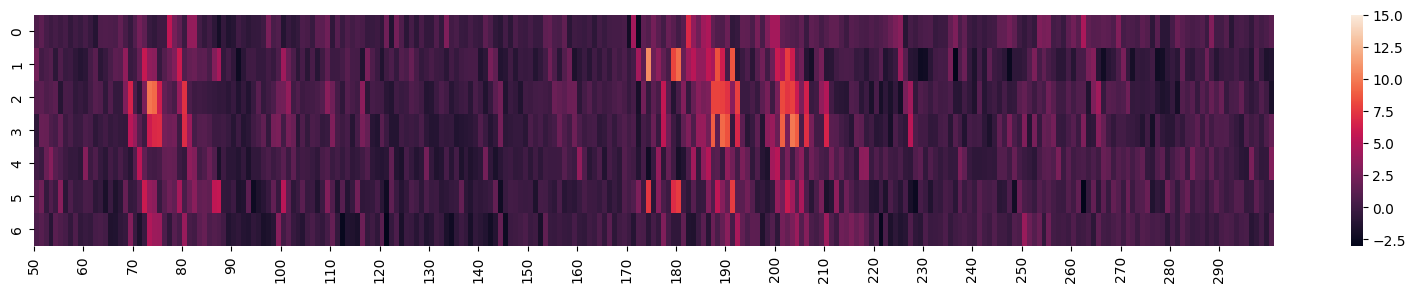

In [276]:
start_btk = 50
end_btk = 300

fig = sns.heatmap(results_btk[1][(start_btk-1):end_btk,:].T, vmin=-3, vmax=15)
# change the ratio of the figure
fig.figure.set_size_inches(20, 3)
# add x axis ticks from 180 to 211 and make them turn 90 degrees
fig.set_xticks(range(0, end_btk-start_btk, 10))
fig.set_xticklabels(range(start_btk, end_btk, 10), rotation=90)
plt.show()

torch.Size([7, 1024])


<ipython-input-277-8e06f658abdc>:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(round(extr.embedding_to_span(query_embeddings_btk[single_query_btk], target_embeddings_btk[single_target_btk][i:i+8, :])['score'], 2))
<ipython-input-277-8e06f658abdc>:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(round(extr.embedding_to_span(query_embeddings_btk[single_query_btk], reversed_target_embeddings[i:i+8, :])['score'], 2))


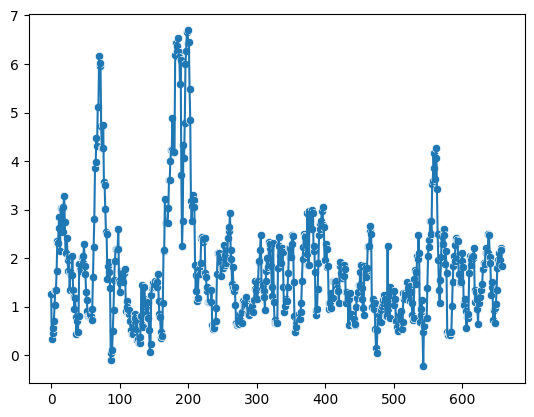

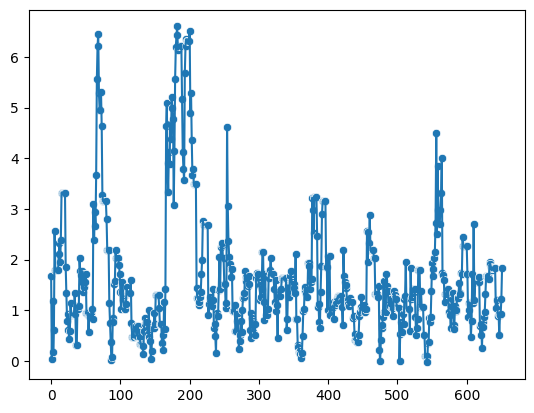

In [277]:
import torch
# loop through the target embedding with a sliding window, and make the alignment against every window with length=10
print(query_embeddings_btk[single_query_btk].shape)
scores_btk = [
    float(round(extr.embedding_to_span(query_embeddings_btk[single_query_btk], target_embeddings_btk[single_target_btk][i:i+8, :])['score'], 2))
    for i in range(target_embeddings_btk[single_target_btk].shape[0])
]

# Reverse the entire target_embeddings_btk array for single_target_btk first
reversed_target_embeddings = torch.flip(target_embeddings_btk[single_target_btk], dims=[0])

# Now calculate scores using the reversed embeddings
scores_back_btk = [
    float(round(extr.embedding_to_span(query_embeddings_btk[single_query_btk], reversed_target_embeddings[i:i+8, :])['score'], 2))
    for i in range(reversed_target_embeddings.shape[0] - 7)  # Ensure no out-of-bounds error
]
# reverse the scores back
scores_back_btk = scores_back_btk[::-1]

sns.scatterplot(x=range(len(scores_btk)), y=scores_btk)
# add line to connect the dots
plt.plot(range(len(scores_btk)), scores_btk)
plt.show()

sns.scatterplot(x=range(len(scores_back_btk)), y=scores_back_btk)
# add line to connect the dots
plt.plot(range(len(scores_back_btk)), scores_back_btk)
plt.show()

In [178]:
from plmalign.plmalign import *
query_fasta = 'example/ELMI000175.fasta'
target_fasta = 'example/PRR7_HUMAN.fasta'
_, query_sequences = read_fasta(query_fasta)
_, target_sequences = read_fasta(target_fasta)
output_path = 'example/output_motif_sh3/'

query_embedding_path = 'example/query_t5_embedding_motif/'
target_embedding_path = 'example/target_t5_embedding_protein/'

query_embeddings = embedding_load(query_fasta, query_embedding_path)
target_embeddings = embedding_load(target_fasta, target_embedding_path)

for single_query in tqdm(query_sequences, desc="Query"):
  print(single_query)
  for single_target in target_sequences:
    print('\n')
    print(single_query)
    print(single_target)
    score, results = pairwise_align(query_embeddings[single_query], target_embeddings[single_target], query_sequences[single_query], target_sequences[single_target], method = 'plmalign', mode='local')
    print(results, score)

Query: 100%|██████████| 1/1 [00:00<00:00, 95.38it/s]

ELMI000175


ELMI000175
PRR7_HUMAN
V------A-V-VRTPPKSPSSAK
|           |||||||||||
EHGAWRL-P-V-SIPLFGRTTAV 4.207658290863037


In [346]:
extr = plmalign()
extr.MODE = 'local'
print(single_query)
results = extr.embedding_to_span(query_embeddings[single_query], target_embeddings[single_target], result_mode='all')

ELMI000175


Query: ELMI000175 Target: PRR7_HUMAN


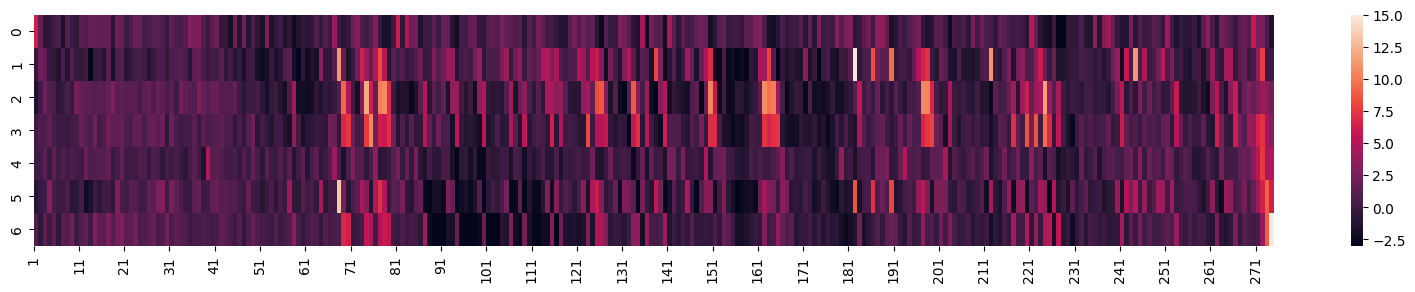

In [347]:
print(f'Query: {single_query}', f'Target: {single_target}')
start = 1
end = target_embeddings[single_target].shape[0]

# change the ratio of the figure
fig = sns.heatmap(results[1][(start-1):end,:].T, vmin=-3, vmax=15)
fig.figure.set_size_inches(20, 3)

# add x axis ticks from 180 to 211 and make them turn 90 degrees
fig.set_xticks(range(0, end-start, 10))
fig.set_xticklabels(range(start, end, 10), rotation=90)

plt.show()

274
TPPKSP
| ||||
P-GLAP 6 70 

RTPPKSP
| |||||
G-LAPPQ 7 71 

RTPPKSP
|||||||
LAPPQPP 7 72 

R-TPPKS
| |||||
APPQPPP 6 73 

R--TP-PKS
|      ||
PPP--P-YS 6 162 

TPPK---SP
| |    ||
F-G-RTTAV 6 268 



<Axes: >

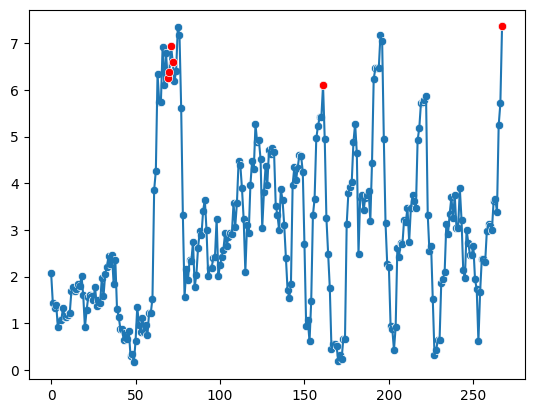

In [328]:
# loop through the target embedding with a sliding window, and make the alignment against every window with length=10
seq1 = query_sequences[single_query]
prr7_seq = 'MVMSQGTYTFLTCFAGFWLIWGLIVLLCCFCSFLRRRLKRRQEERLREQNLRALELEPLELEGSLAGSPPGLAPPQPPPHRSRLEAPAHAHSHPHVHVHPLLHHGPAQPHAHAHPHPHHHALPHPPPTHLSVPPRPWSYPRQAESDMSKPPCYEEAVLMAEPPPPYSEVLTDTRGLYRKIVTPFLSRRDSAEKQEQPPPSYKPLFLDRGYTSALHLPSAPRPAPPCPALCLQADRGRRVFPSWTDSELSSREPLEHGAWRLPVSIPLFGRTTAV'

scores = []
scores_long = []
print(target_embeddings[single_target].shape[0])
for i in range(0, target_embeddings[single_target].shape[0] - len(seq1) + 1):
  seq2 = prr7_seq[i:i+len(seq1)]

  results = extr.embedding_to_span(query_embeddings[single_query], target_embeddings[single_target][i:i+len(seq1), :],
                                   result_mode='all')
  row = results[0]

  score = float(round(row['score'].item(), 2))
  scores.append(score)

  if score > 6:
    aln = draw_alignment(row.indices.to_list()[0], seq1, seq2, output='str')
    query_len = len(aln.split('\n')[0].replace('-', ''))
    if query_len > (len(seq1) - 2):
      print(aln, query_len, i+1, '\n')
      scores_long.append(score)
    else:
      scores_long.append(None)
  else:
    scores_long.append(None)



plt.plot(range(len(scores)), scores)
sns.scatterplot(x=range(len(scores)), y=scores)
sns.scatterplot(x=range(len(scores_long)), y=scores_long, color='red', zorder=3)
# add line to connect the dots

TPP-KSP-
|   |   
K--TK--K 6 183 

RTP-PKS-P
|   |    
T--KK--P- 7 184 

RT-PPK-SP-
|  |    | 
K-KP--L-PP 7 185 

R-T-PP-KS-P
|       | |
KP-L--P-PTP 7 186 

R-T-P-PK-S
|      | |
PL-P-P-TPE 6 187 

RTP-PKS-P
|   |    
L--KK--P- 7 198 

RT-PPK-S
|  |    
K-KP--L- 6 199 



<Axes: >

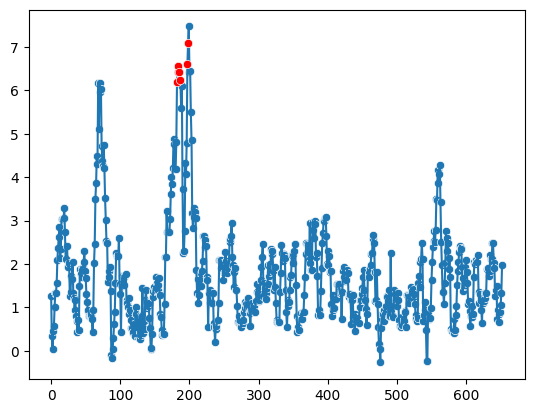

In [330]:
# loop through the target embedding with a sliding window, and make the alignment against every window with length=10
seq1 = query_sequences[single_query]
btk_seq = 'MAAVILESIFLKRSQQKKKTSPLNFKKRLFLLTVHKLSYYEYDFERGRRGSKKGSIDVEKITCVETVVPEKNPPPERQIPRRGEESSEMEQISIIERFPYPFQVVYDEGPLYVFSPTEELRKRWIHQLKNVIRYNSDLVQKYHPCFWIDGQYLCCSQTAKNAMGCQILENRNGSLKPGSSHRKTKKPLPPTPEEDQILKKPLPPEPAAAPVSTSELKKVVALYDYMPMNANDLQLRKGDEYFILEESNLPWWRARDKNGQEGYIPSNYVTEAEDSIEMYEWYSKHMTRSQAEQLLKQEGKEGGFIVRDSSKAGKYTVSVFAKSTGDPQGVIRHYVVCSTPQSQYYLAEKHLFSTIPELINYHQHNSAGLISRLKYPVSQQNKNAPSTAGLGYGSWEIDPKDLTFLKELGTGQFGVVKYGKWRGQYDVAIKMIKEGSMSEDEFIEEAKVMMNLSHEKLVQLYGVCTKQRPIFIITEYMANGCLLNYLREMRHRFQTQQLLEMCKDVCEAMEYLESKQFLHRDLAARNCLVNDQGVVKVSDFGLSRYVLDDEYTSSVGSKFPVRWSPPEVLMYSKFSSKSDIWAFGVLMWEIYSLGKMPYERFTNSETAEHIAQGLRLYRPHLASEKVYTIMYSCWHEKADERPTFKILLSNILDVMDEES'

scores_btk = []
scores_long_btk = []
for i in range(0, target_embeddings_btk[single_target_btk].shape[0] - len(seq1) + 1):
  seq2 = btk_seq[i:i+len(seq1)]

  results = extr.embedding_to_span(query_embeddings_btk[single_query_btk], target_embeddings_btk[single_target_btk][i:i+len(seq1), :],
                                   result_mode='all')
  row = results[0]

  score = float(round(row['score'].item(), 2))
  scores_btk.append(score)

  if score > 6:
    aln = draw_alignment(row.indices.to_list()[0], seq1, seq2, output='str')
    query_len = len(aln.split('\n')[0].replace('-', ''))
    if query_len > (len(seq1) - 2):
      print(aln, query_len, i+1, '\n')
      scores_long_btk.append(score)
    else:
      scores_long_btk.append(None)
  else:
    scores_long_btk.append(None)


plt.plot(range(len(scores_btk)), scores_btk)
sns.scatterplot(x=range(len(scores_btk)), y=scores_btk)
sns.scatterplot(x=range(len(scores_long_btk)), y=scores_long_btk, color='red', zorder=3)

PK-SP-
||    
APE--P 4 208 

PP-KS-P
||    |
PEP--PL 5 207 

TP-PK-S
||    |
EPP--LP 5 206 

RT-PP-K
||    |
PPL--PK 5 205 

R--TP-P
|     |
PLP--KK 4 204 

R-T-P
| | |
LPKKL 3 203 

PKSP
||||
DEEP 4 196 

PPKS
||||
EEPT 4 195 

TPPK
||||
EPTP 4 194 

RTPP
||||
PTPP 4 193 

R-TP
| ||
TPPL 3 192 

RTP-P-K
||    |
PP-L-PK 5 191 

R-T-P-P
|     |
PL-P-KK 4 190 

R-T-P
| | |
LPKKT 3 189 

RTPP-
||   
PP--P 4 77 

R-TP-
|    
PP--N 3 76 



<Axes: >

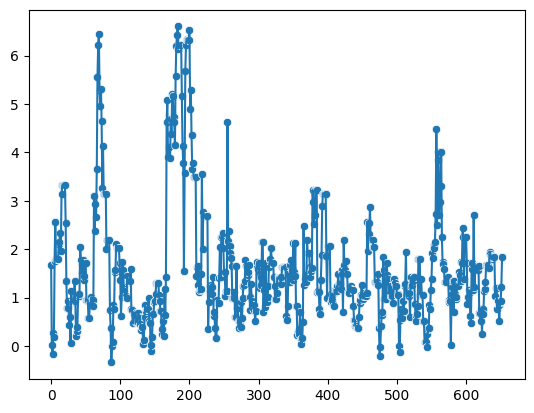

In [345]:
# loop through the target embedding with a sliding window, and make the alignment against every window with length=10
seq1 = query_sequences[single_query]
btk_seq = 'MAAVILESIFLKRSQQKKKTSPLNFKKRLFLLTVHKLSYYEYDFERGRRGSKKGSIDVEKITCVETVVPEKNPPPERQIPRRGEESSEMEQISIIERFPYPFQVVYDEGPLYVFSPTEELRKRWIHQLKNVIRYNSDLVQKYHPCFWIDGQYLCCSQTAKNAMGCQILENRNGSLKPGSSHRKTKKPLPPTPEEDQILKKPLPPEPAAAPVSTSELKKVVALYDYMPMNANDLQLRKGDEYFILEESNLPWWRARDKNGQEGYIPSNYVTEAEDSIEMYEWYSKHMTRSQAEQLLKQEGKEGGFIVRDSSKAGKYTVSVFAKSTGDPQGVIRHYVVCSTPQSQYYLAEKHLFSTIPELINYHQHNSAGLISRLKYPVSQQNKNAPSTAGLGYGSWEIDPKDLTFLKELGTGQFGVVKYGKWRGQYDVAIKMIKEGSMSEDEFIEEAKVMMNLSHEKLVQLYGVCTKQRPIFIITEYMANGCLLNYLREMRHRFQTQQLLEMCKDVCEAMEYLESKQFLHRDLAARNCLVNDQGVVKVSDFGLSRYVLDDEYTSSVGSKFPVRWSPPEVLMYSKFSSKSDIWAFGVLMWEIYSLGKMPYERFTNSETAEHIAQGLRLYRPHLASEKVYTIMYSCWHEKADERPTFKILLSNILDVMDEES'
btk_seq_rev = btk_seq[::-1]

scores_btk_rev = []
scores_long_btk_rev = []
target_embeddings_btk_rev = {}
target_embeddings_btk_rev[single_target_btk] = torch.flip(target_embeddings_btk[single_target_btk], dims=[0])
for i in range(0, target_embeddings_btk[single_target_btk].shape[0] - len(seq1) + 1):
  seq2 = btk_seq_rev[i:i+len(seq1)]

  results = extr.embedding_to_span(query_embeddings_btk[single_query_btk], target_embeddings_btk_rev[single_target_btk][i:i+len(seq1), :],
                                   result_mode='all')
  row = results[0]

  score = float(round(row['score'].item(), 2))
  scores_btk_rev.append(score)

  if score > 6:
    aln = draw_alignment(row.indices.to_list()[0], seq1, seq2, output='str')
    query_len = len(aln.split('\n')[0].replace('-', ''))
    print(aln, query_len, len(btk_seq)-i+1, '\n')
    if query_len > (len(seq1) - 2):
      print(aln, query_len, len(btk_seq)-i+1, '\n')
      scores_long_btk_rev.append(score)
    else:
      scores_long_btk_rev.append(None)
  else:
    scores_long_btk_rev.append(None)

# reverse scores
scores_btk_rev = scores_btk_rev[::-1]
scores_long_btk_rev = scores_long_btk_rev[::-1]

plt.plot(range(len(scores_btk_rev)), scores_btk_rev)
sns.scatterplot(x=range(len(scores_btk_rev)), y=scores_btk_rev)
sns.scatterplot(x=range(len(scores_btk_rev)), y=scores_long_btk_rev, color='red', zorder=3)